In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# 1. 데이터 로드

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/9주/TSLA.csv')

# 시작, 최고가, 최저가를 가지고 종가 예측
features = ['Open', 'High', 'Low']
target = ['Close']
data = df[features + target].values

In [4]:
# 2. 정규화

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
# 3. 시퀀스 생성 (window=12)

X_all = data_scaled[:, :3]   # Open, High, Low
y_all = data_scaled[:, 3]    # Close

window = 12
X, y = [], []
for i in range(len(X_all) - window):
    X.append(X_all[i:i+window])
    y.append(y_all[i+window])

X, y = np.array(X), np.array(y)

In [6]:
# 4. Train/Test 분할 (8:2)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("X_train:", X_train.shape)  # (샘플, 12, 3)
print("y_train:", y_train.shape)  # (샘플,)

X_train: (2355, 12, 3)
y_train: (2355,)


In [7]:
# 5. RNN 모델 생성

rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window, 3)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# 6. 컴파일

rnn_model.compile(optimizer='adam', loss='mse')

In [9]:
# 7. 학습

history_rnn = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0012 - val_loss: 0.0580
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.9814e-06 - val_loss: 0.0389
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.5951e-06 - val_loss: 0.0271
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.4396e-06 - val_loss: 0.0291
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8683e-06 - val_loss: 0.0233
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9761e-06 - val_loss: 0.0213
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.6785e-06 - val_loss: 0.0183
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.2794e-06 - val_loss: 0.0171
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.2484e-06 - val_loss: 0.0132
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2944e-06 - val_loss: 0.0136
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.4061e-06 - val_loss: 0.0109
Epoch

In [10]:
# 8. 평가

loss = rnn_model.evaluate(X_test, y_test)
print(f"\n최종 테스트 손실(MSE): {loss:.6f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7118e-04

최종 테스트 손실(MSE): 0.002643


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


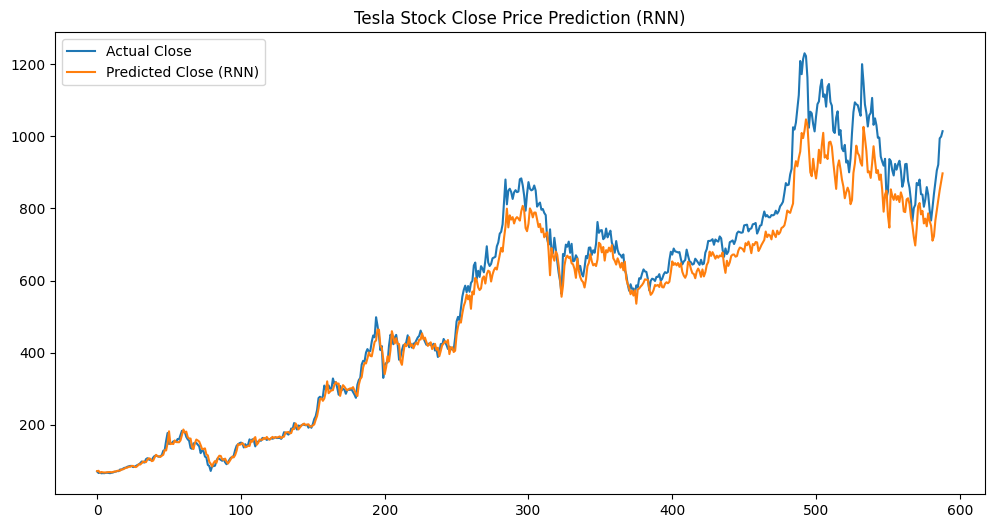

In [11]:
# 9. 시각화

y_pred = rnn_model.predict(X_test)

# 역정규화 (Close 컬럼만)
y_pred_full = np.zeros((len(y_pred), data.shape[1]))
y_test_full = np.zeros((len(y_test), data.shape[1]))
y_pred_full[:, 3] = y_pred[:, 0]
y_test_full[:, 3] = y_test
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 3]
y_test_inv = scaler.inverse_transform(y_test_full)[:, 3]

# 시각화
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Close')
plt.plot(y_pred_inv, label='Predicted Close (RNN)')
plt.title('Tesla Stock Close Price Prediction (RNN)')
plt.legend()
plt.show()

In [12]:
# 5-2. LSTM 모델 생성

lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window, 3)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# 6-2. 컴파일

lstm_model.compile(
    optimizer='adam',
    loss='mse'
)

In [14]:
# 7-2. 학습

history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 2.0333e-04 - val_loss: 0.0141
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.1301e-06 - val_loss: 0.0121
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.3810e-06 - val_loss: 0.0120
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 5.1441e-06 - val_loss: 0.0141
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 5.7815e-06 - val_loss: 0.0151
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 4.7175e-06 - val_loss: 0.0125
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 4.7389e-06 - val_loss: 0.0127
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 4.0957e-06 - val_loss: 0.0119
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 4.9457e-06 - val_loss: 0.0125
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.3037e-06 - val_loss: 0.0134
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.8974e-06 - val_loss: 0.01

In [15]:
# 8-2. 평가

loss = lstm_model.evaluate(X_test, y_test)
print(f"\n최종 테스트 손실(MSE): {loss:.6f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013    

최종 테스트 손실(MSE): 0.003529


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


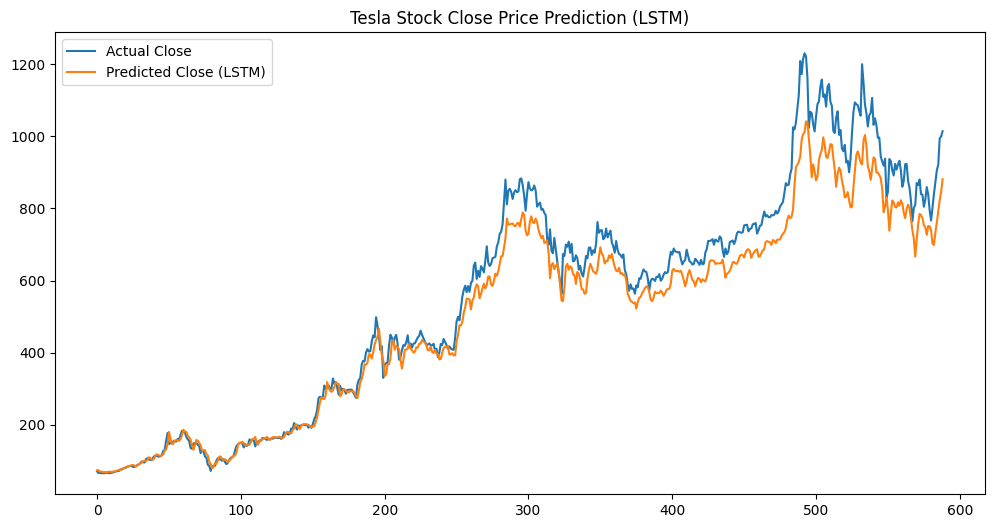

In [16]:
# 9-2. 시각화

y_pred = lstm_model.predict(X_test)

# Close 컬럼만 역정규화
y_pred_full = np.zeros((len(y_pred), data.shape[1]))
y_test_full = np.zeros((len(y_test), data.shape[1]))
y_pred_full[:, 3] = y_pred[:, 0]
y_test_full[:, 3] = y_test
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 3]
y_test_inv = scaler.inverse_transform(y_test_full)[:, 3]

# 시각화
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Close')
plt.plot(y_pred_inv, label='Predicted Close (LSTM)')
plt.title('Tesla Stock Close Price Prediction (LSTM)')
plt.legend()
plt.show()